<h3> Session 8 </h4>

<I>

### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.optim.lr_scheduler import MultiStepLR


import sys
sys.path.append('../')

# Loading classes from py files
from model import Net
from utils import Utility
from constants import *
from dataset import *
from transforms import *
from train import train, test, plot_loss_accuracy, plot_misclassified
from misclassified import *

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()

print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x000001CE2C5D4280>
Device available for the script - cuda


##### Create Batch loader for train/test dataset  <hr>

In [4]:
get_data = Dataset(batch_size=64)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

Shape of the batch - torch.Size([64, 3, 32, 32])
Total images in the batch - 64


##### View sample images from the train loader  <hr>



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


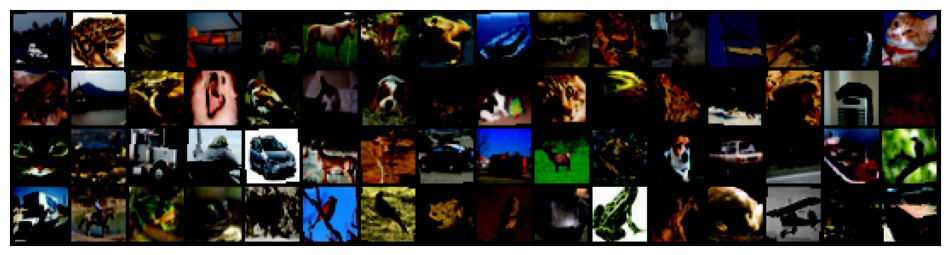

In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#get_utilitites.plot_grid(train_loader)
get_utilitites.show_batch(train_loader)

##### CNN Model summary  <hr>


In [7]:
model = Net(normalization='bn').to(device)

summary(model, input_size=(3, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 28, 28]             648
              ReLU-2           [-1, 24, 28, 28]               0
       BatchNorm2d-3           [-1, 24, 28, 28]              48
           Dropout-4           [-1, 24, 28, 28]               0
            Conv2d-5           [-1, 24, 28, 28]           5,184
              ReLU-6           [-1, 24, 28, 28]               0
       BatchNorm2d-7           [-1, 24, 28, 28]              48
           Dropout-8           [-1, 24, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]             384
             ReLU-10           [-1, 16, 28, 28]               0
        MaxPool2d-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 24, 14, 14]           3,456
             ReLU-13           [-1, 24, 14, 14]               0
      BatchNorm2d-14           [-1, 24,

#### Let's Train and test our model
---


In [8]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)
scheduler = MultiStepLR(optimizer, milestones=[8,12], gamma=0.1)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()

Epoch 1


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 1.2062, Accuracy: 5666/10000 (56.66%)

Epoch 2


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.9716, Accuracy: 6507/10000 (65.07%)

Epoch 3


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.9000, Accuracy: 6885/10000 (68.85%)

Epoch 4


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.7973, Accuracy: 7256/10000 (72.56%)

Epoch 5


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.8049, Accuracy: 7209/10000 (72.09%)

Epoch 6


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.8147, Accuracy: 7170/10000 (71.70%)

Epoch 7


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.7596, Accuracy: 7341/10000 (73.41%)

Epoch 8


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.7055, Accuracy: 7578/10000 (75.78%)

Epoch 9


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.6168, Accuracy: 7875/10000 (78.75%)

Epoch 10


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.5997, Accuracy: 7941/10000 (79.41%)

Epoch 11


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.5956, Accuracy: 7938/10000 (79.38%)

Epoch 12


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.5973, Accuracy: 7955/10000 (79.55%)

Epoch 13


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.5865, Accuracy: 8000/10000 (80.00%)

Epoch 14


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.5803, Accuracy: 7983/10000 (79.83%)

Epoch 15


  0%|          | 0/782 [00:04<?, ?it/s]


Test set: Average loss: 0.5810, Accuracy: 7978/10000 (79.78%)



Plot the Loss/Accuracy for Train/Test dataset

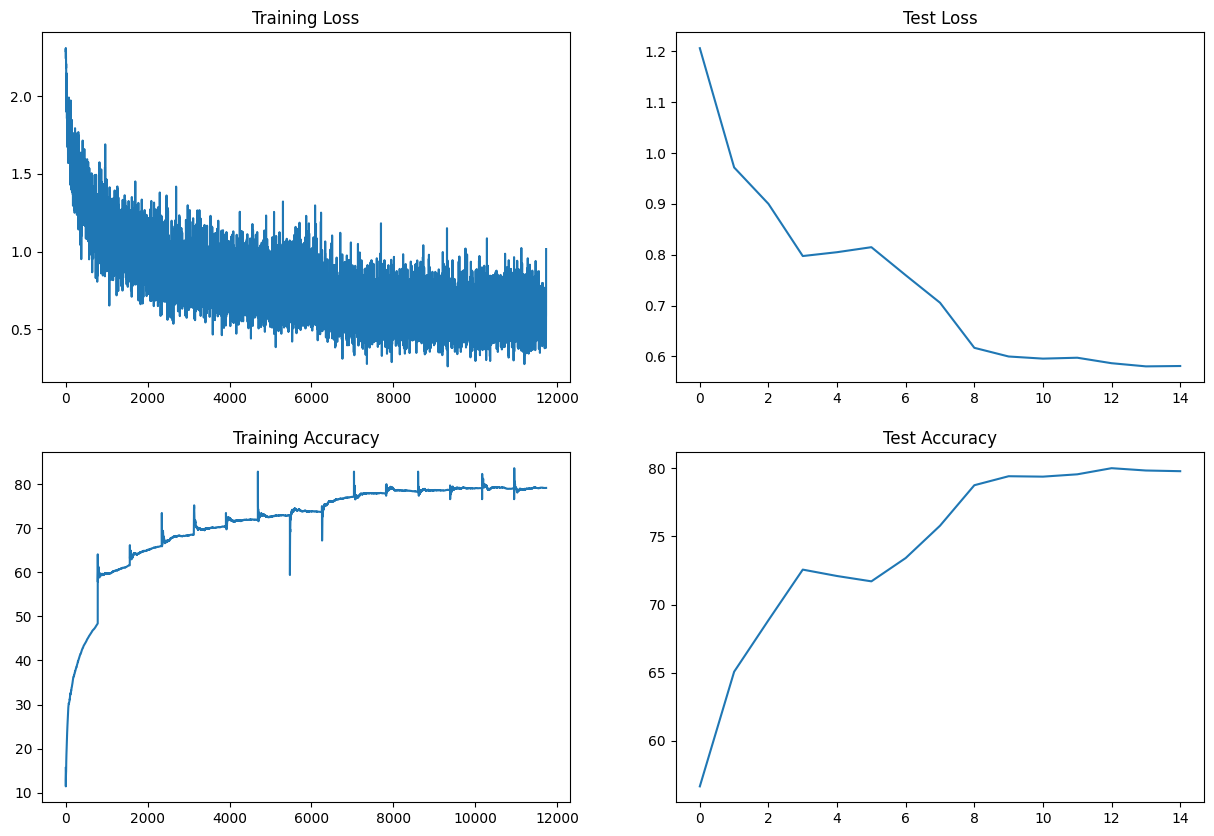

In [9]:
plot_loss_accuracy()

Plot misclassified images

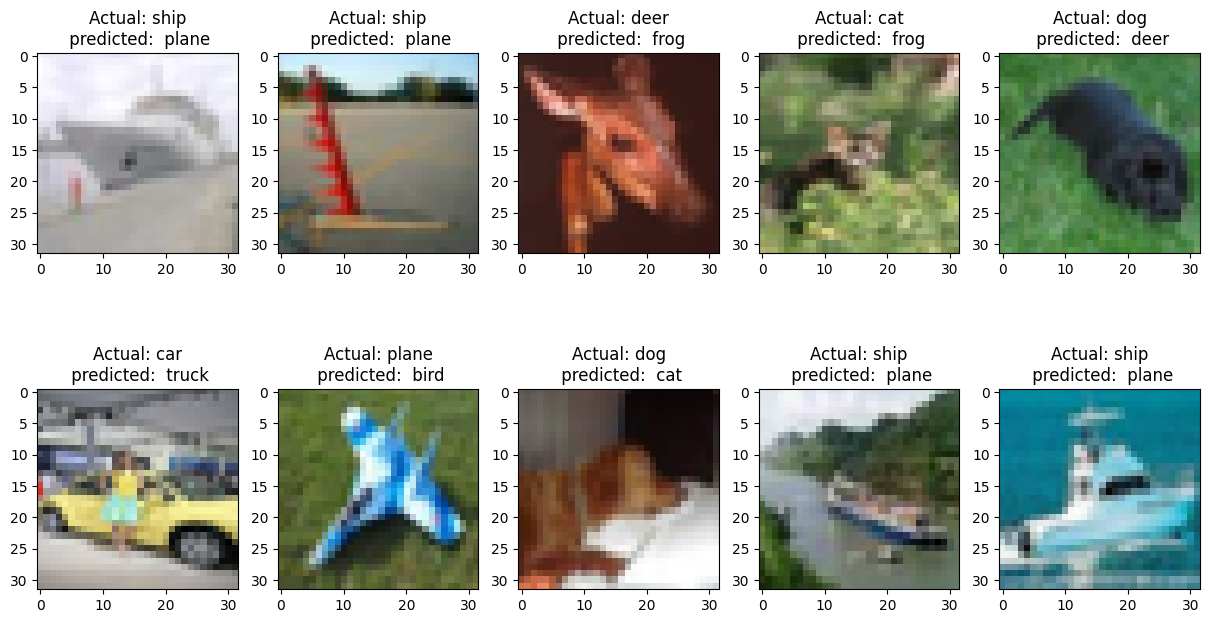

In [10]:
images, actuals, preds = test_misclassified(model,device,test_loader)
plot_images(images, actuals, preds, classes)